In [1]:
# Let's load and process the dataset
from fuel.datasets.dogs_vs_cats import DogsVsCats

In [2]:
dogs_vs_cats = DogsVsCats(('train',))

First we explore how to get individual pictures and plot them. 

In [ ]:
handle = dogs_vs_cats.open()
first_image, first_target = dogs_vs_cats.get_data(handle, 5) 
dogs_vs_cats.close(handle)

In [22]:
first_image.shape

(3, 319, 417)

In [7]:
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


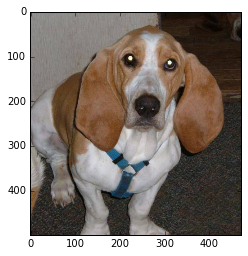

In [24]:
plt.imshow(first_image.transpose((1,2,0)))

The three channels look essentially same, suggesting we can use only one channel to train our model.

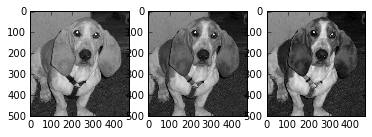

In [25]:
plt.subplot(1,3,1)
plt.imshow(first_image.transpose((1,2,0))[:,:,0],cmap=cm.gray)
plt.subplot(1,3,2)
plt.imshow(first_image.transpose((1,2,0))[:,:,1],cmap=cm.gray)
plt.subplot(1,3,3)
plt.imshow(first_image.transpose((1,2,0))[:,:,2],cmap=cm.gray)




The histograms and boxplots below show that for most of the pictures (height,width) lie in [100,500] x [100,500] .

In [40]:
sizearray=numpy.ndarray((dogs_vs_cats.num_examples,2))
handle = dogs_vs_cats.open()
for i in range(dogs_vs_cats.num_examples):
    first_image, first_target = dogs_vs_cats.get_data(handle, i) 
    sizearray[i,:]=first_image.shape[1:3]
dogs_vs_cats.close(handle)

In [45]:
sizearray.shape

(25000, 2)

In [46]:
height=sizearray[:,0]
width=sizearray[:,1]


(32.0, 768.0)

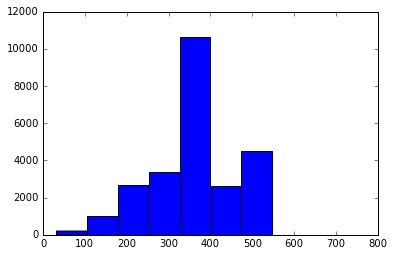

In [47]:
plt.hist(height)
min(height),max(height)

(42.0, 1050.0)

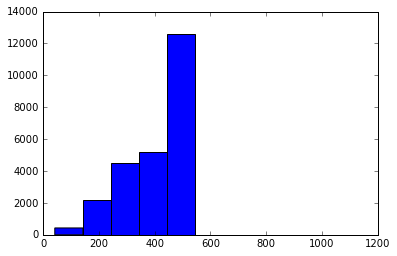

In [48]:
plt.hist(width)
min(width),max(width)

{'boxes': [<matplotlib.lines.Line2D at 0x11a5099b0>],
 'caps': [<matplotlib.lines.Line2D at 0x11a506710>,
 'fliers': [<matplotlib.lines.Line2D at 0x11a4ec908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11841d780>],
 'whiskers': [<matplotlib.lines.Line2D at 0x119db5dd8>,
  <matplotlib.lines.Line2D at 0x11a514c88>]}

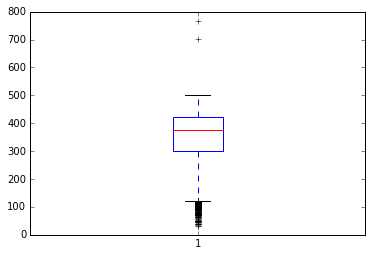

In [49]:
plt.boxplot(height)

{'boxes': [<matplotlib.lines.Line2D at 0x1183c6898>],
 'caps': [<matplotlib.lines.Line2D at 0x118399518>,
 'fliers': [<matplotlib.lines.Line2D at 0x1183a1710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1183a1358>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1183c6cf8>,
  <matplotlib.lines.Line2D at 0x11842eb38>]}

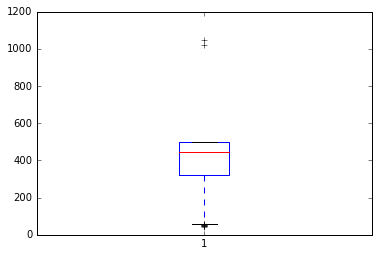

In [50]:
plt.boxplot(width)